# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [5]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [7]:
wind_turbine = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-10-27/wind-turbine.csv')

Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
glimpse(wind_turbine)

Rows: 6,698
Columns: 15
$ objectid                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ province_territory         <chr> "Alberta", "Alberta", "Alberta", "Alberta",…
$ project_name               <chr> "Optimist Wind Energy", "Castle River Wind …
$ total_project_capacity_mw  <dbl> 0.90, 44.00, 3.78, 3.78, 3.78, 3.78, 19.50,…
$ turbine_identifier         <chr> "OWE1", "CRW1", "WWT1", "WWT2", "WWT3", "WW…
$ turbine_number_in_project  <chr> "1/2", "1/60", "1/6", "2/6", "3/6", "4/6", …
$ turbine_rated_capacity_k_w <dbl> 150, 600, 600, 600, 600, 660, 1300, 1300, 1…
$ rotor_diameter_m           <dbl> 23, 44, 44, 44, 44, 47, 60, 60, 60, 60, 60,…
$ hub_height_m               <dbl> 30, 40, 50, 50, 50, 50, 46, 46, 46, 46, 46,…
$ manufacturer               <chr> "Bonus", "Vestas", "Vestas", "Vestas", "Ves…
$ model                      <chr> "AN 150/30", "V44/600", "V44/600", "V44/600…
$ commissioning_date         <chr> "1993", "1997", "1998", "1998", "1998", "20…
$ latitude      

Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

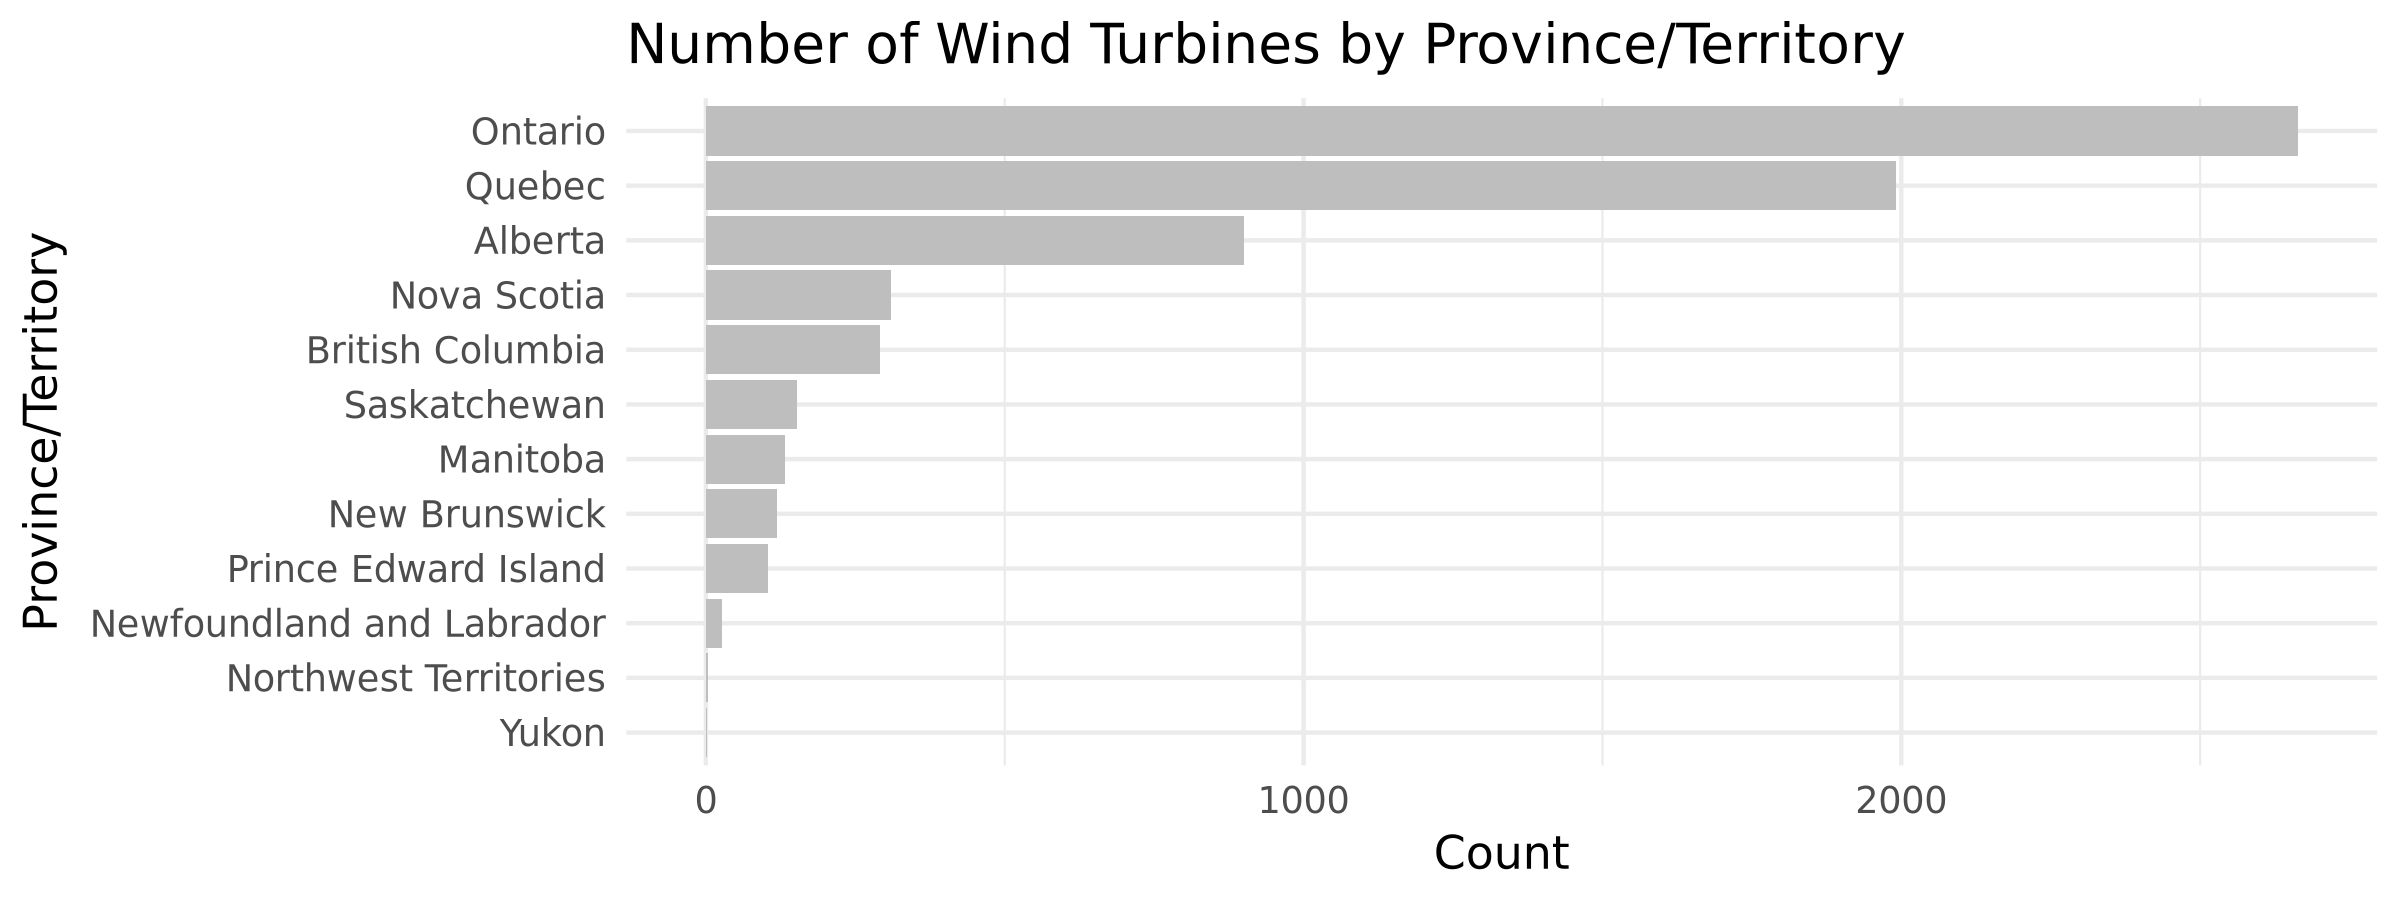

In [14]:
options(repr.plot.width = 8, repr.plot.height = 3, repr.plot.res = 300)

df = wind_turbine |>
  mutate(province_territory = fct_infreq(province_territory) |> fct_rev())

ggplot(df, aes(y = province_territory)) + 
  geom_bar() + 
  geom_bar(fill = "grey", data = df) +
  labs(
    title = "Number of Wind Turbines by Province/Territory",
    x = "Count",
    y = "Province/Territory"
  ) +
  theme_minimal()

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

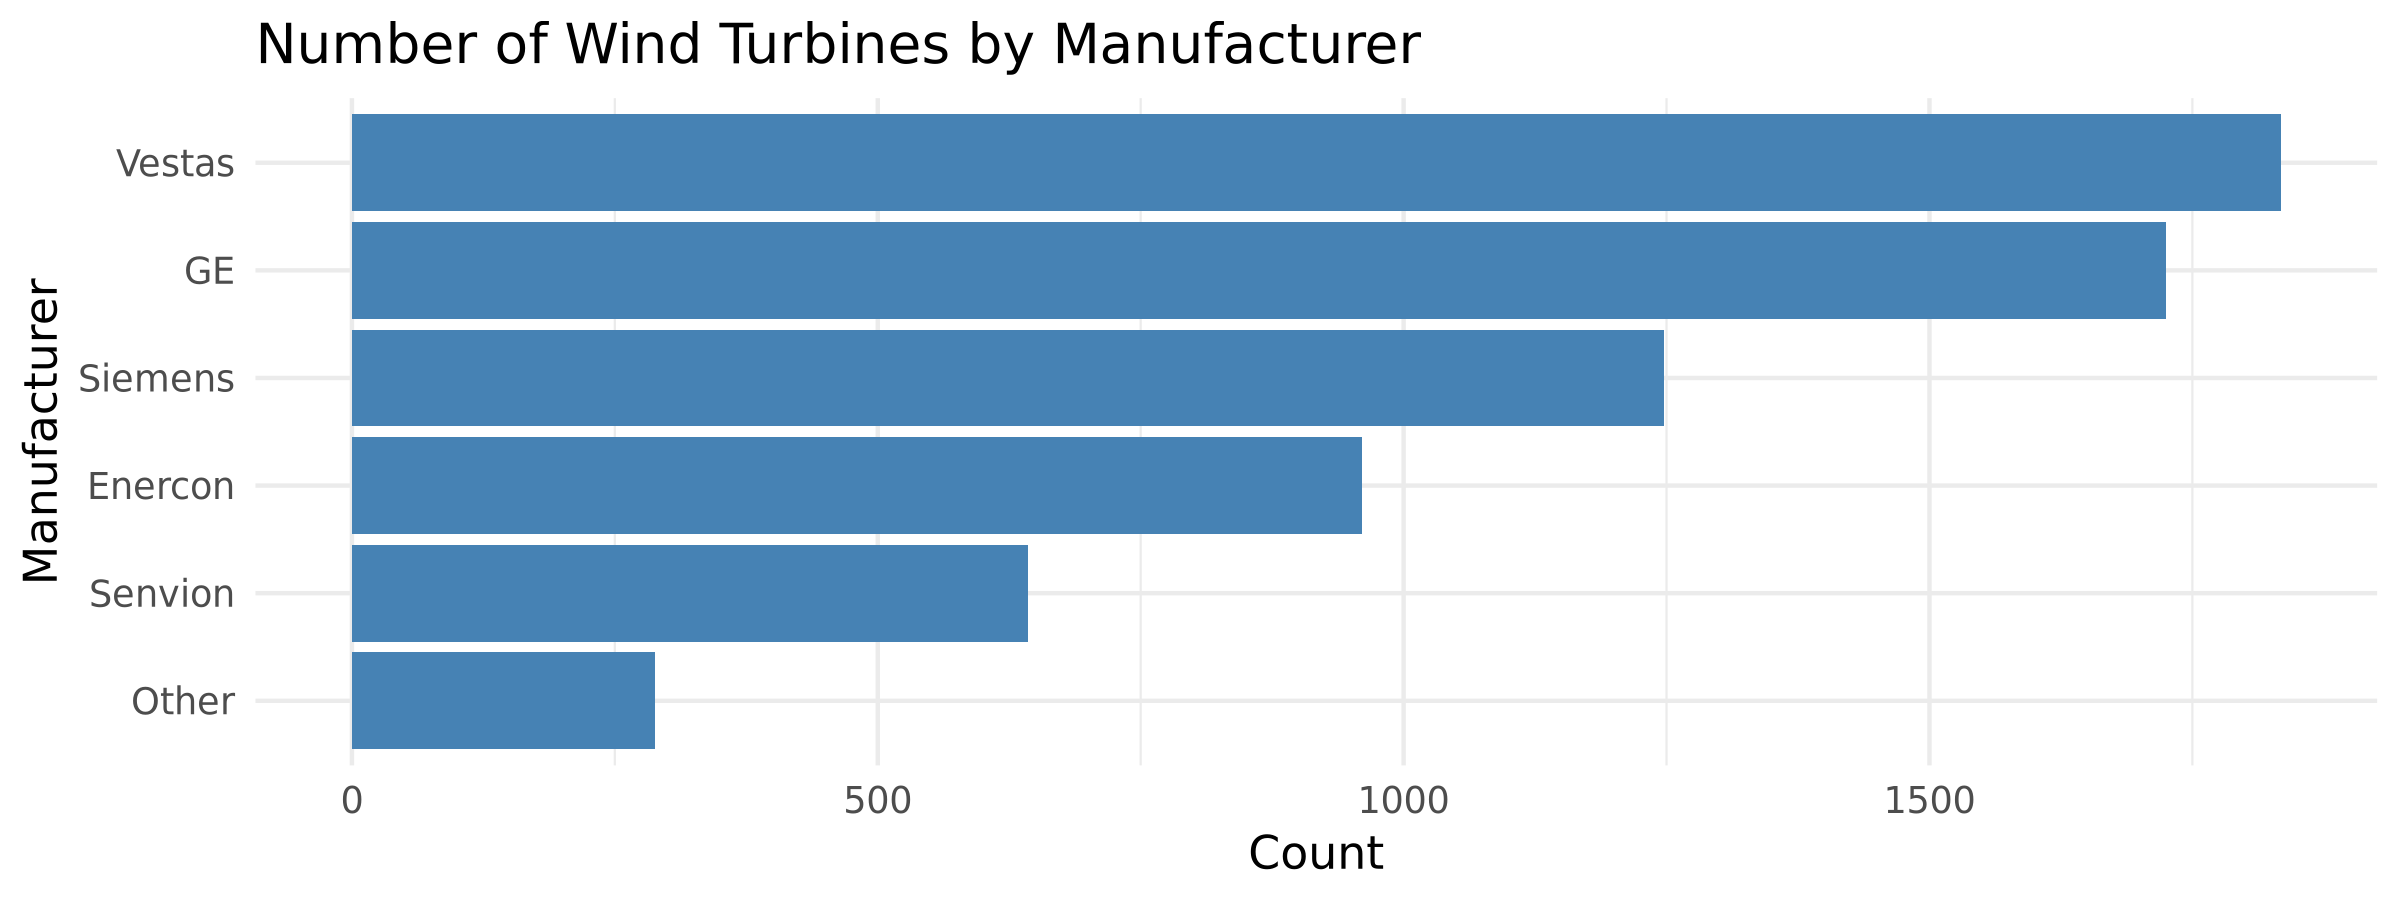

In [16]:
df_lumped = wind_turbine |>
  mutate(
    manufacturer_lumped = manufacturer |>
      fct_lump(n = 5) |>                # 상위 5개로 묶음
      fct_infreq() |>                   # 빈도순으로 정렬
      fct_relevel("Other", after = Inf) |>  # "Other"를 마지막 레벨로
      fct_rev()                         # 역순 정렬
  )

# 막대 차트 생성
p = ggplot(df_lumped, aes(y = manufacturer_lumped)) +
  geom_bar(fill = "steelblue") +
  labs(
    title = "Number of Wind Turbines by Manufacturer",
    x = "Count",
    y = "Manufacturer"
  ) +
  theme_minimal()

p

Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

In [22]:
install.packages("mapdata")  # 처음 설치 시 한 번만 실행
library(ggplot2)
library(dplyr)
library(mapdata)

also installing the dependency ‘maps’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




Now we can retrieve the "data" for a map of Canada. Run this code:

In [23]:
canada = map_data('world', region='Canada')  

Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?

No, they are not. 
Canada map data : 'long''lat'
turbine data : 'latitude''longitude'

In [25]:
# 캐나다 지도 데이터의 열 이름 확인
colnames(canada)

# 터빈 데이터 열 이름 확인
colnames(wind_turbine)

[1] "long"      "lat"       "group"     "order"     "region"    "subregion"

[1] "objectid"                   "province_territory"        
 [3] "project_name"               "total_project_capacity_mw" 
 [5] "turbine_identifier"         "turbine_number_in_project" 
 [7] "turbine_rated_capacity_k_w" "rotor_diameter_m"          
 [9] "hub_height_m"               "manufacturer"              
[11] "model"                      "commissioning_date"        
[13] "latitude"                   "longitude"                 
[15] "notes"

The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

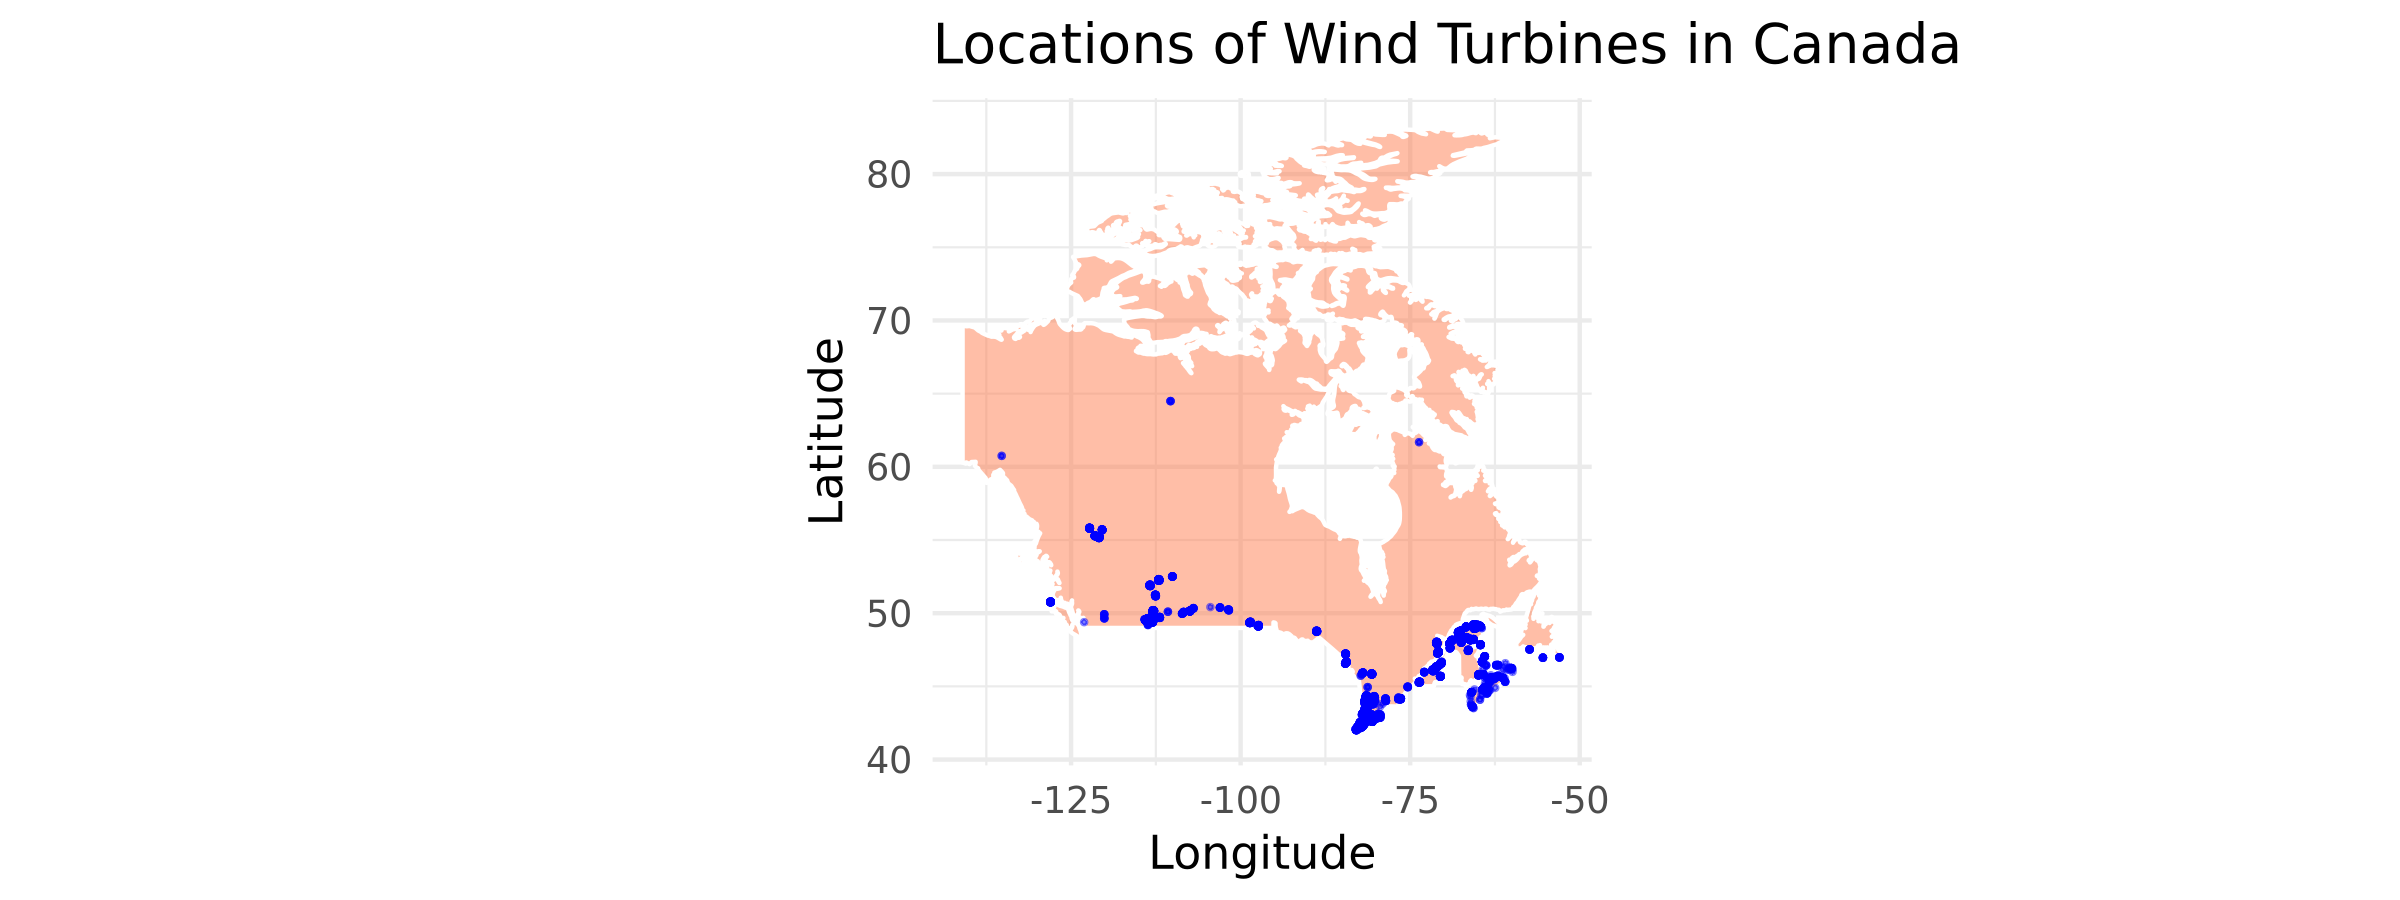

In [27]:
ggplot(data = canada) +
  geom_polygon(
    aes(x = long, y = lat, group = group), 
    fill = "coral", color = "white", alpha = 0.5
  ) +
  geom_point(
    data = wind_turbine,
    aes(x = longitude, y = latitude),
    color = "blue", size = 0.3, alpha = 0.5
  ) +
  coord_quickmap() +
  labs(
    title = "Locations of Wind Turbines in Canada",
    x = "Longitude",
    y = "Latitude"
  ) +
  theme_minimal()